# DATA READING 

In [1]:
# Import Libraries
import pandas as pd
data = pd.read_csv('D:/Bootcamp DS/Final Project DS/Case 3/loan.csv')

# DATA UNDERSTANDING

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [3]:
data.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [4]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [5]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


# Preprocessing Data

In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['gender'] = label_encoder.fit_transform(data['gender'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['education_level'] = label_encoder.fit_transform(data['education_level'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

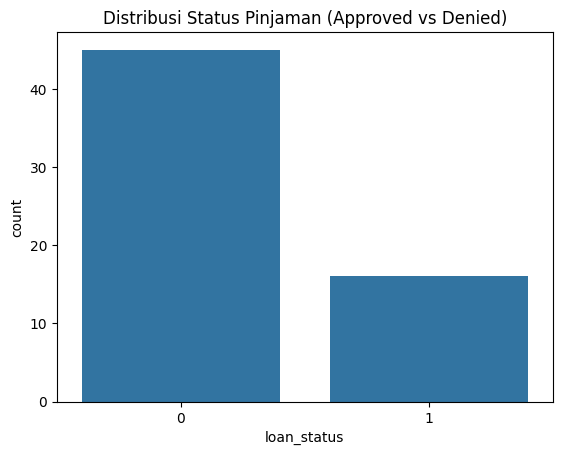

In [8]:
# Visualisasi distribusi status pinjaman
sns.countplot(x='loan_status', data=data)
plt.title('Distribusi Status Pinjaman (Approved vs Denied)')
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Membagi data menjadi fitur (X) dan target (y)
X = data.drop('loan_status', axis=1)  # 'target' adalah nama kolom label
y = data['loan_status']  # Kolom label

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah oversampling
print("Distribusi sebelum SMOTE:")
print(y_train.value_counts())  # Sebelum oversampling

print("\nDistribusi setelah SMOTE:")
print(y_train_smote.value_counts())  # Setelah oversampling


Distribusi sebelum SMOTE:
loan_status
0    30
1    12
Name: count, dtype: int64

Distribusi setelah SMOTE:
loan_status
0    30
1    30
Name: count, dtype: int64


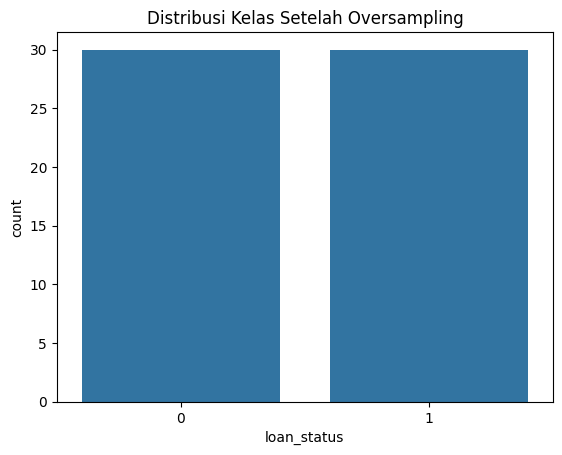

In [16]:
# Visualisasi distribusi status pinjaman setelah oversampling
sns.countplot(x=y_train_smote)
plt.title('Distribusi Kelas Setelah Oversampling')
plt.show()

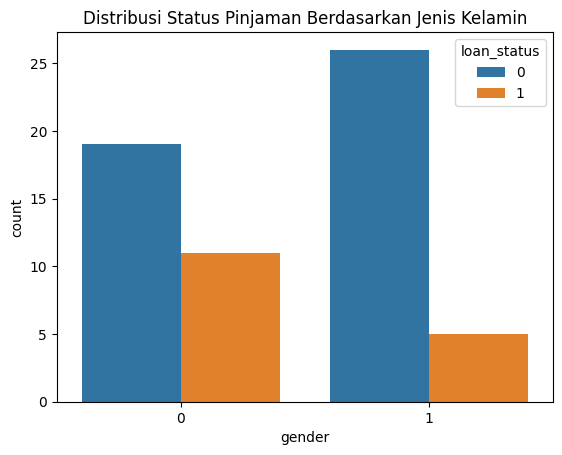

In [17]:
# Visualisasi distribusi status pinjaman berdasarkan jenis kelamin
sns.countplot(x='gender', hue='loan_status', data=data)
plt.title('Distribusi Status Pinjaman Berdasarkan Jenis Kelamin')
plt.show()


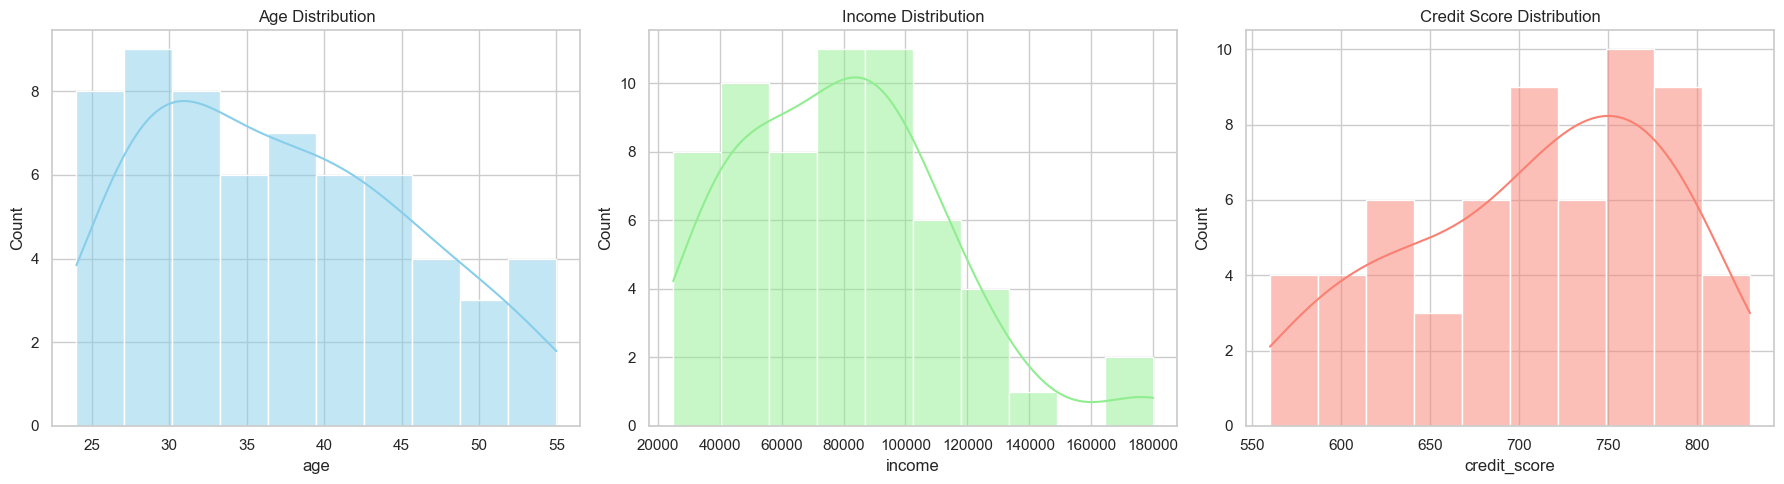

In [18]:
# Set the plot style
sns.set(style="whitegrid")

# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(data['age'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Income distribution
sns.histplot(data['income'], bins=10, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Income Distribution')

# Credit score distribution
sns.histplot(data['credit_score'], bins=10, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Credit Score Distribution')

plt.tight_layout()
plt.show()


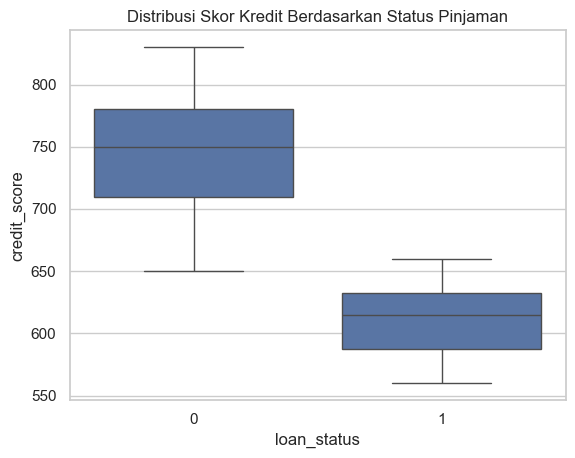

In [19]:
sns.boxplot(x='loan_status', y='credit_score', data=data)
plt.title('Distribusi Skor Kredit Berdasarkan Status Pinjaman')
plt.show()


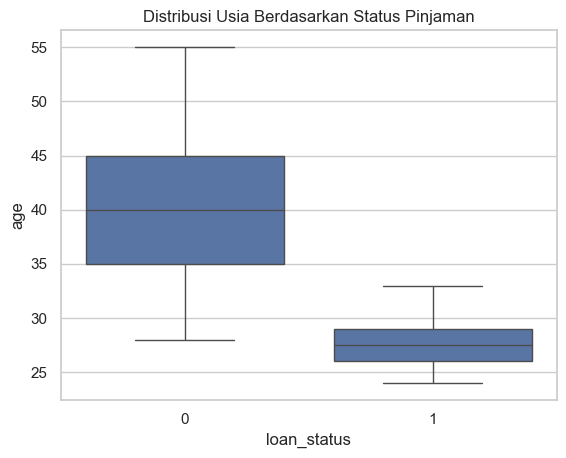

In [20]:
sns.boxplot(x='loan_status', y='age', data=data)
plt.title('Distribusi Usia Berdasarkan Status Pinjaman')
plt.show()


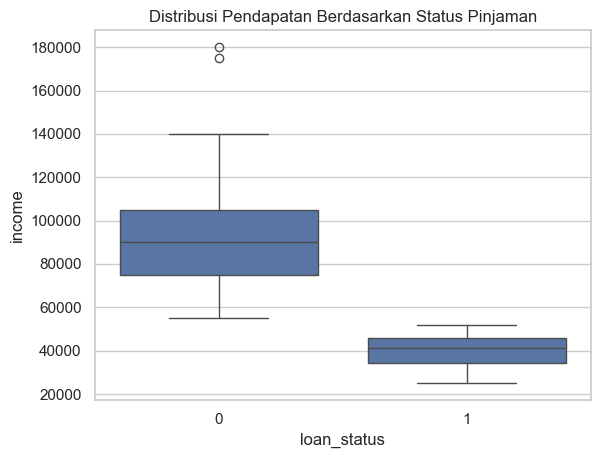

In [21]:
sns.boxplot(x='loan_status', y='income', data=data)
plt.title('Distribusi Pendapatan Berdasarkan Status Pinjaman')
plt.show()


# MODEL BUILDING

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model KNN dengan jumlah neighbor (k) yang diinginkan
k = 5  # Anda bisa mencoba nilai k yang berbeda
knn_model = KNeighborsClassifier(n_neighbors=k)

# Melatih model menggunakan data training yang telah di-resample
knn_model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

Akurasi: 0.95

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.80      1.00      0.89         4

    accuracy                           0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19



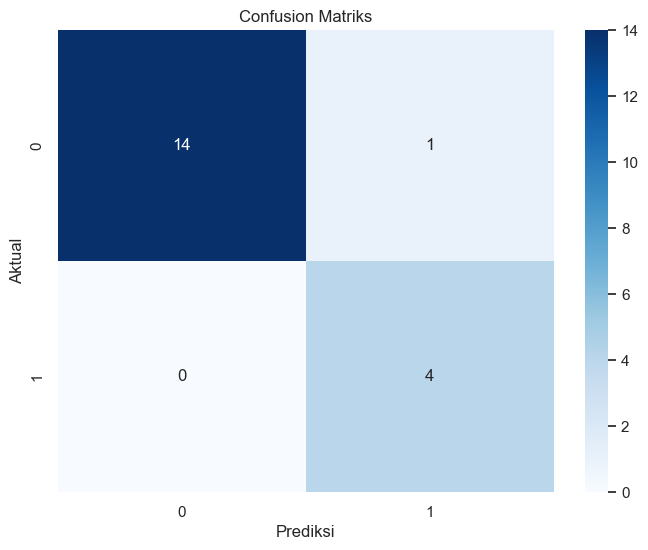

In [26]:
y_pred = knn_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matriks
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matriks')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()